# Polynomial Regression

**Data Preparation**

In [26]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/Position_Salaries.csv')

In [27]:
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


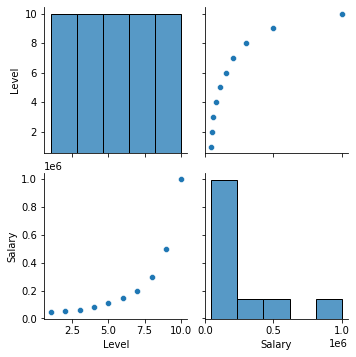

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.pairplot(data)

In [29]:
from sklearn.model_selection import train_test_split
X = data.iloc[:,1:2].values
Y = data.iloc[:,2:3].values
X_train, X_test, Y_train, Y_test = train_test_split(
    data.iloc[:,1:2].values, data.iloc[:,2:3].values, test_size=0.2)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
Y_train=scaler.fit_transform(Y_train)
Y_test=scaler.fit_transform(Y_test)

**Building the Model**

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error 


poly_reg = PolynomialFeatures(4)

#call fit_transform on the x variables.
X_poly = poly_reg.fit_transform(X_train)

#now fit the transformed x's to the y's
poly_reg.fit(X_poly, Y_train)

#create an object of the class LinearRegression
lin_reg = LinearRegression()

#fit the model to our transformed X
lin_reg.fit(X_poly, Y_train)

X_test_poly = poly_reg.fit_transform(X_test)
y_pred=lin_reg.predict(X_test_poly)
training_score=mean_squared_error (Y_train,lin_reg.predict(X_poly))
test_score=mean_squared_error(Y_test,y_pred)
print("MSE for the training Dataset: " + str(training_score))
print("MSE for the testing Dataset: " +  str(test_score))

MSE for the training Dataset: 0.0016114787685745052
MSE for the testing Dataset: 0.17720143745345088


**Evaluation Model**

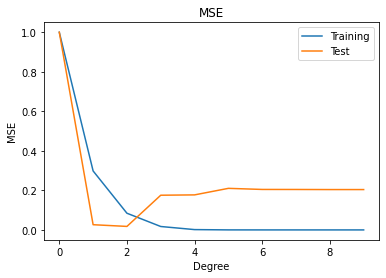

In [32]:
train = []
test = []
for i in range(0,10):
    poly=PolynomialFeatures(degree=i, )
    X_poly=poly.fit_transform(X_train)
    l=LinearRegression()
    l.fit(X_poly,Y_train)
    
    X_test_poly =poly.fit_transform(X_test)
    y_pred=l.predict(X_test_poly)
    training_score=mean_squared_error (Y_train,l.predict(X_poly))
    test_score=mean_squared_error(Y_test,y_pred)
    train.append(training_score)
    test.append(test_score)

x=np.arange(10)
plt.plot(x,train,label="Training")
plt.plot(x,test,label="Test")
plt.legend()
plt.xlabel("Degree")
plt.ylabel("MSE")
plt.title("MSE");
plt.show()

# Ridge regularization & Cross Validation

In [33]:
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.kernel_ridge import KernelRidge

#define model
model = KernelRidge(alpha = 0.003, kernel = 'poly', degree = 4, gamma = 1, coef0 = 1)

#define model evaluation method
cv = RepeatedKFold(n_splits = 6, n_repeats = 5, random_state = 1)

#evaluate model
scores = cross_val_score(model, X_train, Y_train, scoring = 'neg_mean_absolute_error', cv = cv,  n_jobs = -1)

# # force scores to be positive
scores = absolute(scores)
print("Mean MAE: %.3f (%.3f)" % (scores.mean(), scores.std()))
model.fit(X_train, Y_train)
y_pred = model.predict(Y_test)

print("MSE for the training Dataset: " + str(training_score))
print("MSE for the testing Dataset: " + str(test_score))

Mean MAE: 0.366 (0.490)
MSE for the training Dataset: 8.484433999105197e-28
MSE for the testing Dataset: 0.2041115037040434


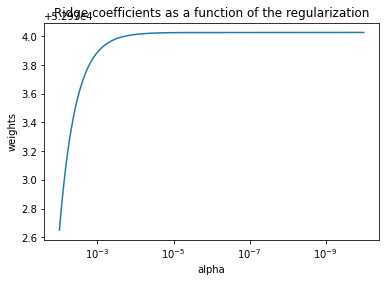

In [35]:
from sklearn.linear_model import Ridge

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = Ridge(alpha = a, fit_intercept = False)
    ridge.fit(X, Y)
    coefs.append(ridge.coef_[0][0])

# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

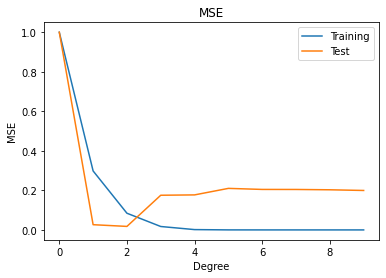

In [38]:
train = []
test = []
for i in range(0, 10):
  model = KernelRidge(alpha = 0.002, kernel = 'poly', degree = i, gamma = 1, coef0 = 1)
  model.fit(X_train, Y_train)
  y_pred = model.predict(X_test)
  training_score = mean_squared_error(Y_train, model.predict(X_train))
  test_score = mean_squared_error(Y_test, y_pred)
  train.append(training_score)
  test.append(test_score)

x = np.arange(10)
plt.plot(x, train, label = "Training")
plt.plot(x, test, label = "Test")
plt.legend()
plt.xlabel("Degree")
plt.ylabel("MSE")
plt.title("MSE")
plt.show()

# Visualizing the Regression

In [39]:
poly_reg = PolynomialFeatures(4)

# call fit_transform on the x variable
X_poly = poly_reg.fit_transform(X_train)

# now fit the transformed x's to the y's
poly_reg.fit(X_poly, Y_train)

# create an object of the class LinearRegression
lin_reg = LinearRegression()

# fit the model to our transformed X 
lin_reg.fit(X_poly, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
X = scaler.fit_transform(X)
Y = scaler.fit_transform(Y)

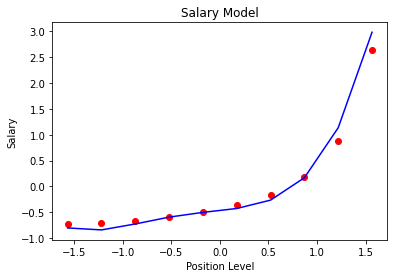

In [41]:
# create a scatter plot with x and y
plt.scatter(X, Y, color = 'red')

# plot the predictions as a blue line
plt.plot(X, lin_reg.predict(poly_reg.fit_transform(X)), color = 'blue')

# axes and title labels
plt.title('Salary Model')
plt.xlabel('Position Level')
plt.ylabel('Salary')

# show the completed plot
plt.show()

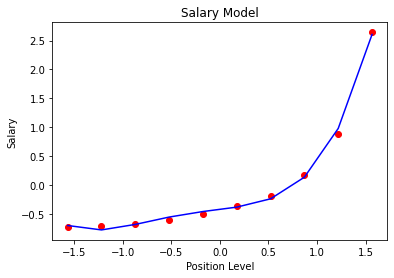

In [42]:
model = KernelRidge(alpha = 0.003, kernel = 'poly', degree = 4, gamma = 1, coef0 = 1)
model.fit(X, Y)

# create a scatter plot with x and y
plt.scatter(X, Y, color = 'red')

# plot the predictions as a blue line
plt.plot(X, model.predict(X), color = 'blue')

# axes and title labels
plt.title('Salary Model')
plt.xlabel('Position Level')
plt.ylabel('Salary')

# show the completed plot
plt.show()

# Decision Tree

> Data Preparation

In [43]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/bill_authentication.csv')

In [44]:
data.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


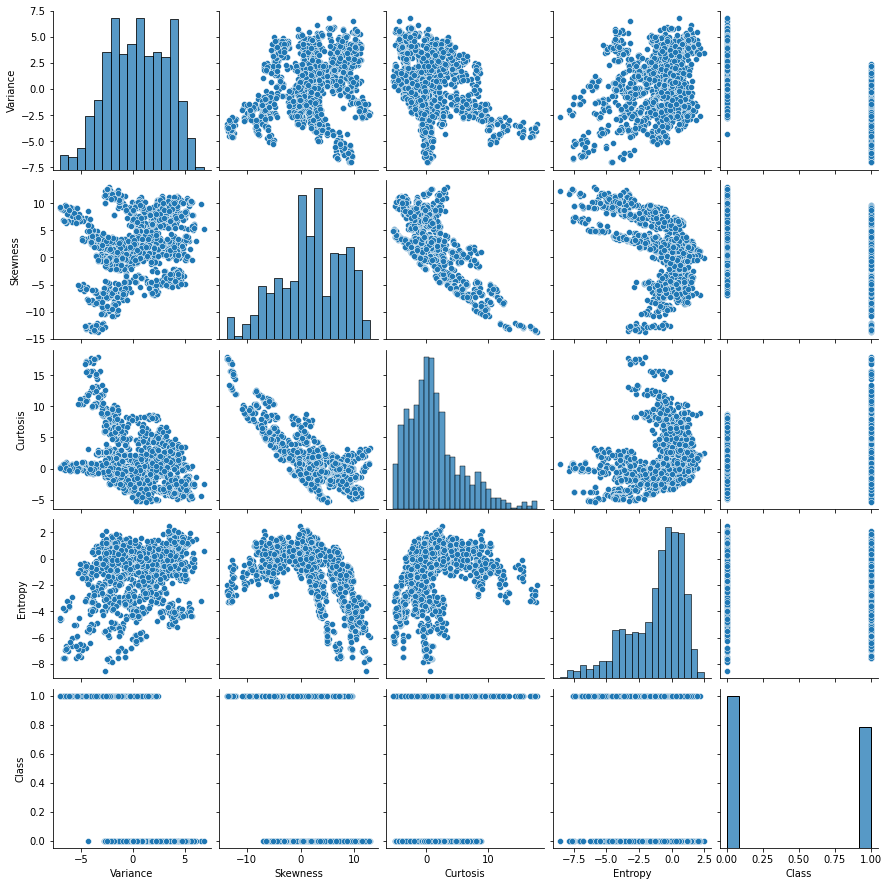

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.pairplot(data)

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data[data.columns[:-1]], data['Class'], test_size = 0.2)

> Building Decision Tree Model

In [47]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifier
clf = clf.fit(X_train, Y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

> Evaluating Model

In [48]:
from sklearn import metrics

print("Accuracy:" , metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.9636363636363636


In [49]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[145   5]
 [  5 120]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       150
           1       0.96      0.96      0.96       125

    accuracy                           0.96       275
   macro avg       0.96      0.96      0.96       275
weighted avg       0.96      0.96      0.96       275



> Visualizing Decision Trees

In [50]:
!pip install graphviz

In [51]:
!pip install pydotplus

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


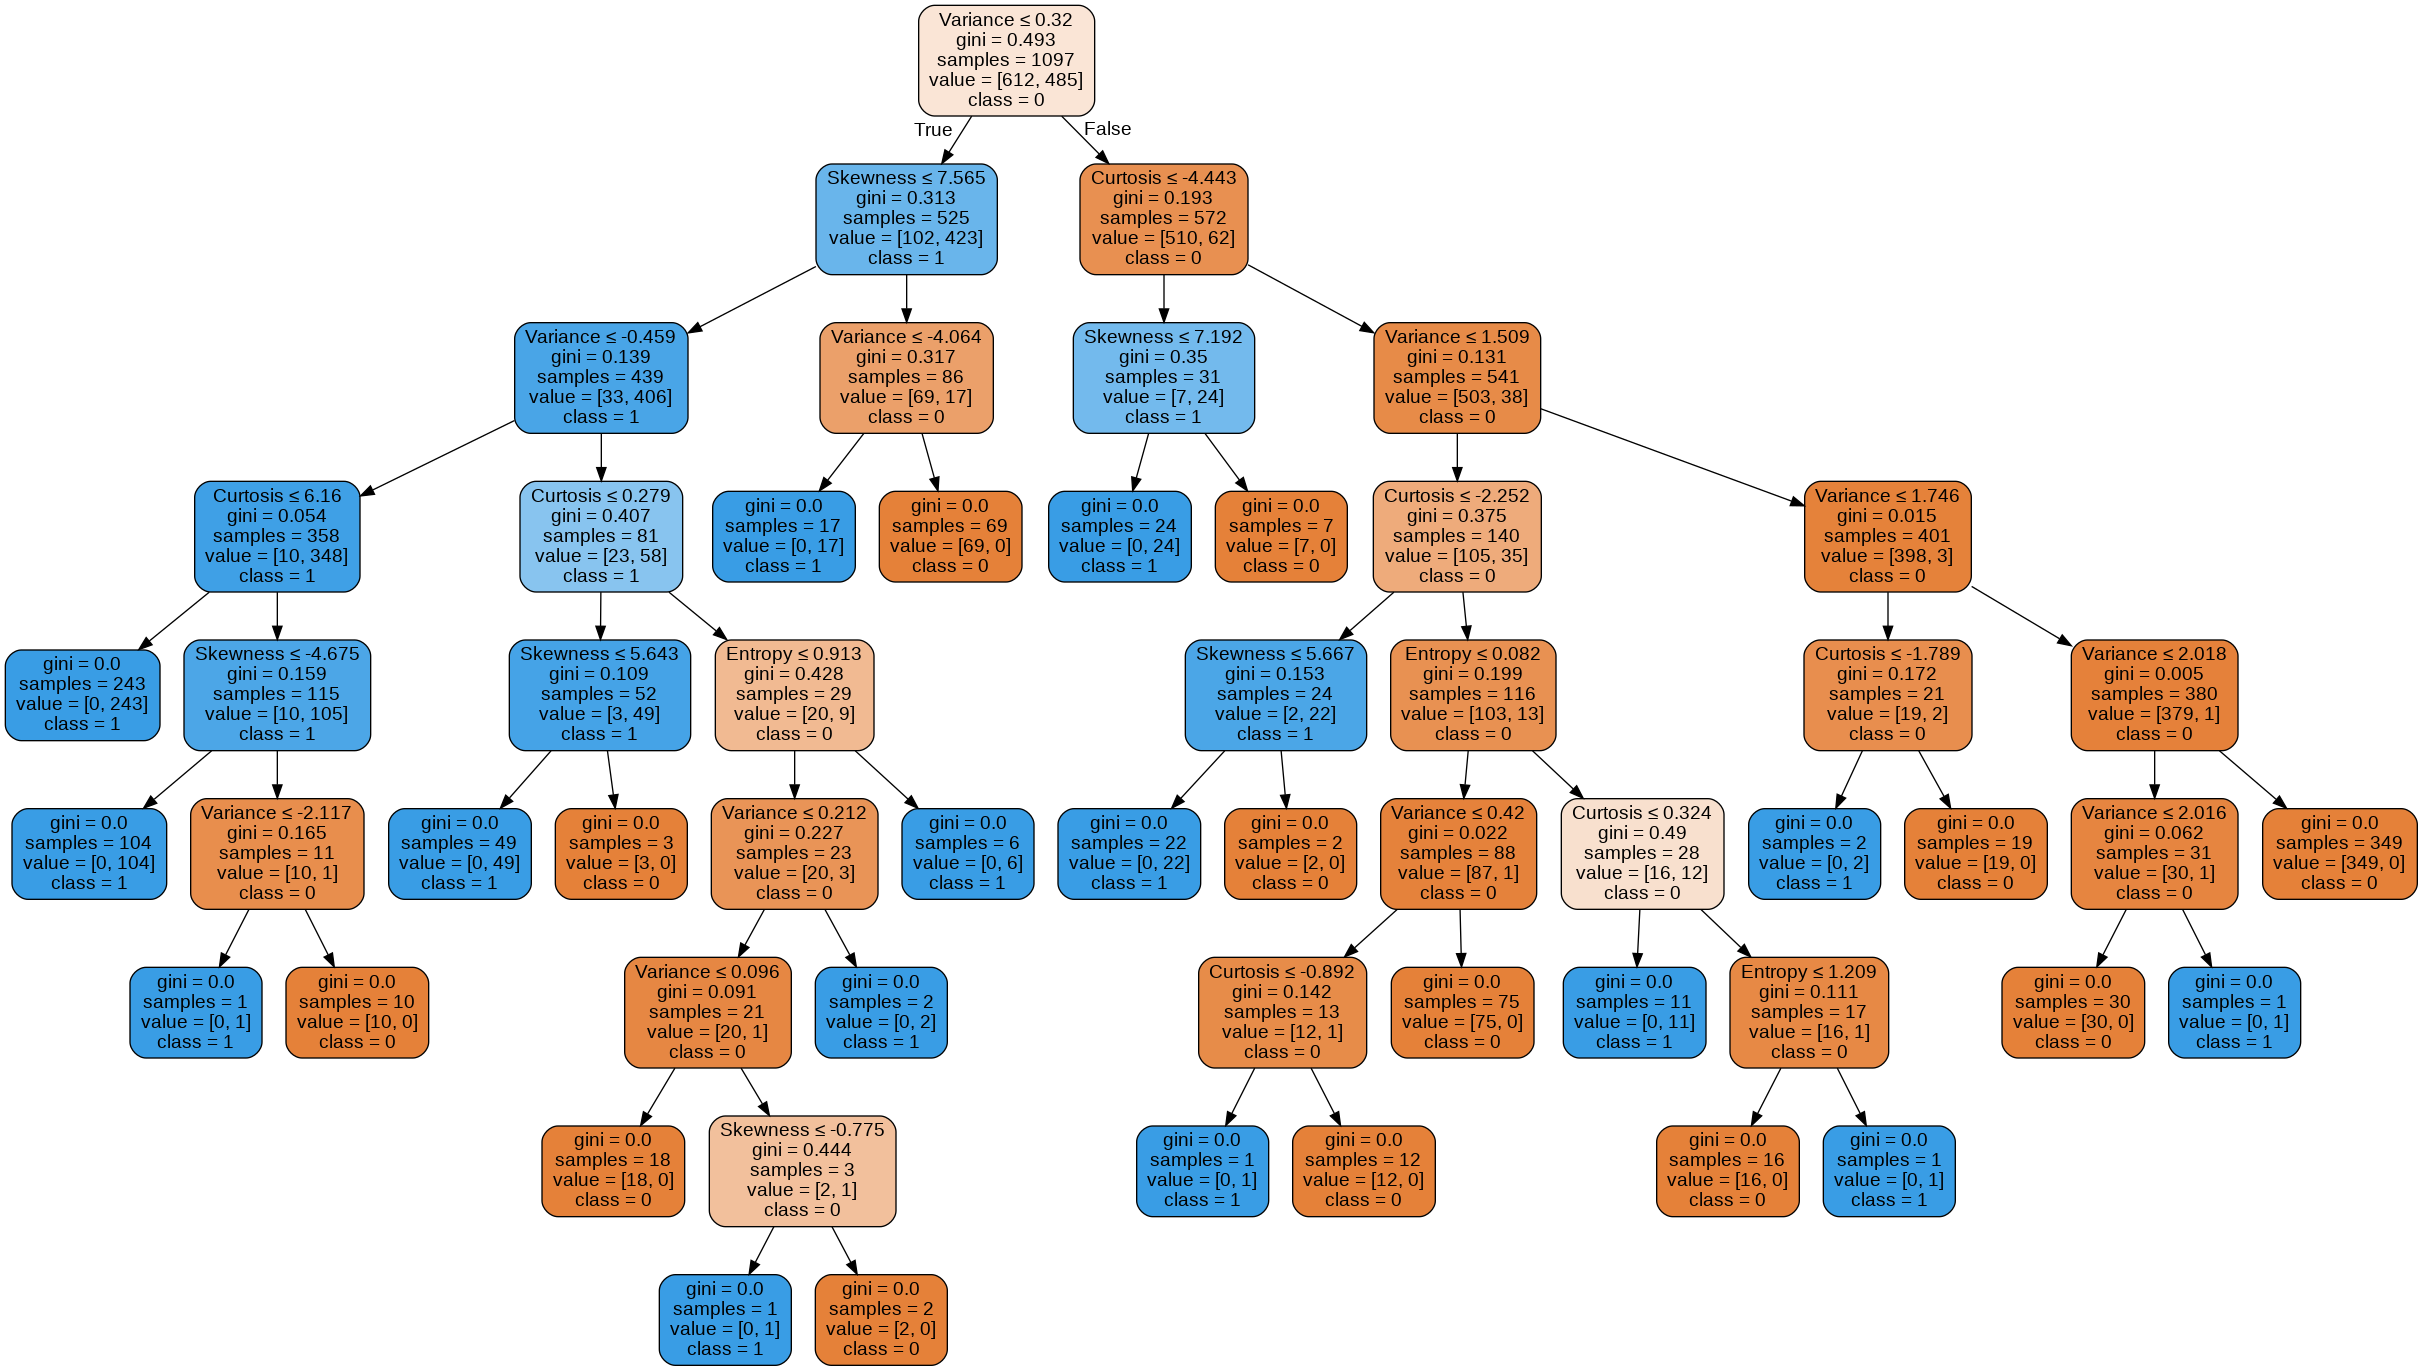

In [53]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, 
                filled = True, rounded = True, 
                special_characters = True, feature_names = data.columns[:-1], class_names = ['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

> Optimazing Decision Tree Performance

In [54]:
# Create Decision Tree Classifier object
clf = DecisionTreeClassifier(criterion = "entropy", max_depth = 3)

# Train Decision Tree Classifier
clf = clf.fit(X_train, Y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.9345454545454546


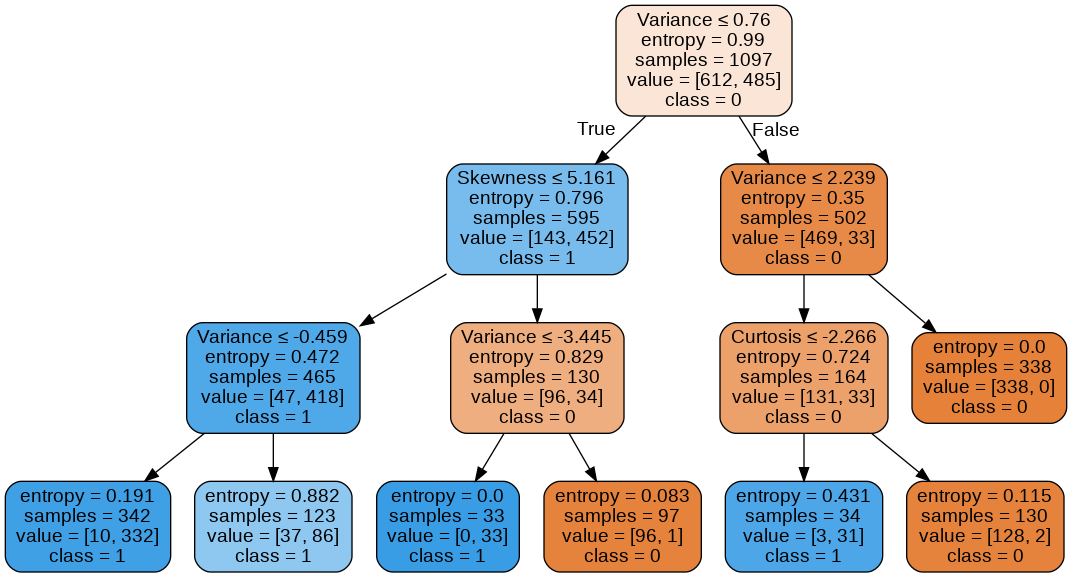

In [55]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = data.columns[:-1],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Regression

We are going to obtain two different Datasets, the purpose is to show the main reason why the number of the rows(points) it's important and the second one is to show how the overfitting works in these examples.

> First model

In [56]:
data = pd.read_csv('/content/drive/MyDrive/Position_Salaries.csv')

In [57]:
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


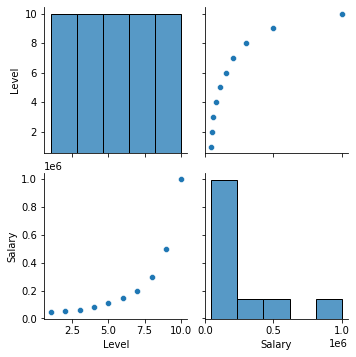

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.pairplot(data)

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    data[data.columns[1:-1]], data['Salary'], test_size = 0.2)

In [61]:
# set independent variable by using all rows, but just column 1
X_train = X_train.values
X_test = X_test.values

# set the dependent variable using all rows but only the last column
Y_train = Y_train.values
Y_test = Y_test.values

> Second Model

In [62]:
data2 = pd.read_csv('/content/drive/MyDrive/50_Startups.csv')

In [63]:
data2.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [64]:
data2 = data2.drop(columns=['State', 'Administration'])

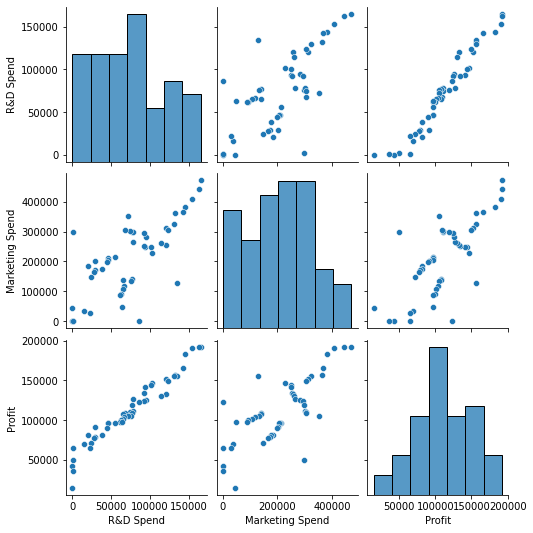

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.pairplot(data2)

In [67]:
from sklearn.model_selection import train_test_split

X_train2, X_test2, Y_train2, Y_test2 = train_test_split(
    data2[data2.columns[:-1]], data2['Profit'], test_size = 0.2)

**Building Decison Tree Regression Model**

> First model

In [68]:
from sklearn.tree import DecisionTreeRegressor

# create Decision Tree regressor object
regressor = DecisionTreeRegressor(random_state = 0)

# Train Decision Tree Regressor
regressor = regressor.fit(X_train, Y_train)

# Predict the response for test dataset
y_pred = regressor.predict(X_test)

> Second model

In [70]:
from sklearn.tree import DecisionTreeRegressor

# Create Decision Tree regressor object
regressor2 = DecisionTreeRegressor(random_state = 0)

# Train Decision Tree Regressor
regressor2 = regressor2.fit(X_train2, Y_train2)

# Predict the response for test dataset
y_pred2 = regressor2.predict(X_test2)

**Evaluating Model**

> First model

In [71]:
print("Accuracy:", regressor.score(X_test, Y_test))

Accuracy: 0.5802469135802469


> Second model

In [73]:
print("Accuracy:", regressor2.score(X_test2, Y_test2))

Accuracy: 0.8357541246354158


It's obvious that the first model had just 8 points that lead to overfitting like we can see the accuracy for the two points in the test part is 0.05, which means that the model is not appropriate. On the other hand, the second model is showing good results.

**Visualizing Decision Trees**

> First model

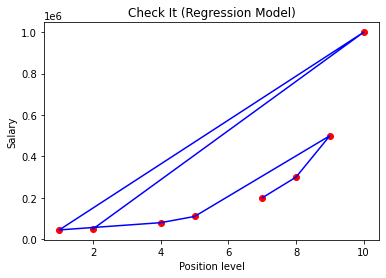

In [74]:
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Check It (Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

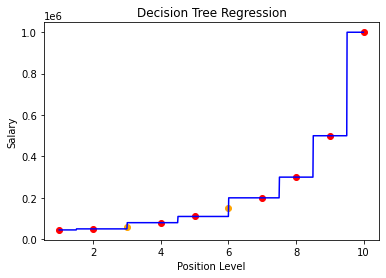

In [76]:
# Create a grid, necessary because of the vertical jumps
X_grid = np.arange(min(X_train), max(X_train), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

# Create a scatter plot
plt.scatter(X_train, Y_train, color = 'red')
plt.scatter(X_test, Y_test, color = 'orange')

# Plot the X values and the predictions
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')

# Titles and labels
plt.title('Decision Tree Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')

plt.show()

> Second model

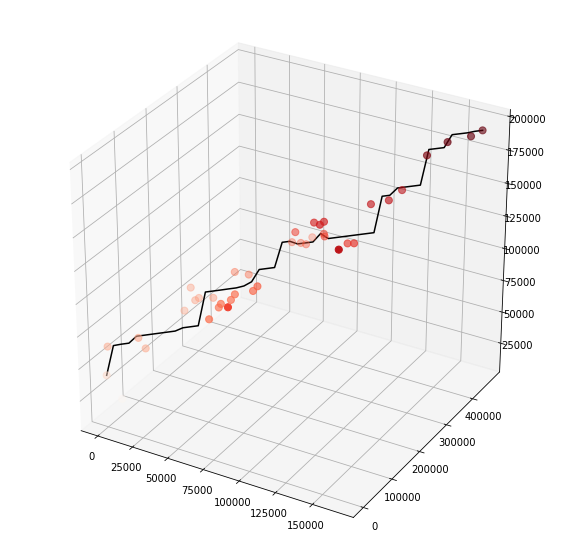

In [77]:
# First well create the 3d figure.
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')

#Next well pull out the datapoints for each axis
zdata = Y_train2
xdata = X_train2.iloc[:,0]
ydata = X_train2.iloc[:, 1]

#Now we plot the points 
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Reds', s = 50);

#Next we need to make x and y dimensions for the data.
xline = np.linspace(min(xdata), max(xdata), 50)
yline = np.linspace(min(ydata), max(ydata), 50)

#combine those back into a dataset to apply the prediction on 
z = np.concatenate((xline.reshape(-1,1),yline.reshape(-1,1)), axis = 1)

#call the predictions 
zline = regressor2.predict(z)

#plot the resulting line. 
ax.plot3D(xline, yline, zline, 'black')